# Data Wrangling and Analysis

## Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import requests
import tweepy
import json
import warnings
warnings.filterwarnings("ignore")

### Twitter Enhanced Archive

Reading the downloaded twitter enhanced archive 

In [2]:
twitter_archive = pd.read_csv("Downloads/twitter-archive-enhanced.csv")

### Image Predictions

The url to request the tsv from by using the requests library

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

Downloading the image-predictions.tsv file from the above url by using the requests library

In [5]:
data = requests.get(url)

The downloaded file(image-predictions.tsv) is in an HTML format and is being read by a library called BeautifulSoup

In [6]:
soup = BeautifulSoup(data.text)

Printing the HTML file in a more readable format by using BeautifulSoup

In [7]:
print(soup.prettify())

<html>
 <body>
  <p>
   tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.

Accessing the string inside the body and p tags of the HTML file using BeautifulSoup

In [8]:
doc = soup.body.p.string

Creating an image_prediction file in a tsv format by using the open format

In [9]:
with open("Documents/project/image_predictions", "w") as f:
    image_predictions = f.write(doc)

Reading the saved image_predictions.tsv file

In [10]:
image_predictions = pd.read_csv("Downloads/image_predictions", sep="\t")

### Twitter API

Consumer key, Consumer secret, Access key and Access secret are needed to get accessing to Twitter API

In [11]:
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET KEY"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS TOKEN SECRET"

Authenticating the keys and secrets to get access to Twitter API

In [12]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Querying the Twitter API by using the tweet_id  column from the twitter_archive table

In [13]:
import time
with open("Documents/project/tweet_json.txt", "a", encoding="utf-8") as f:
    for tweet_id in twitter_archive["tweet_id"]:
        try:
            data = api.get_status(tweet_id, tweet_mode="extended")
            json.dump(data._json, f)
            f.write("\n")
        except:
            continue
time.sleep(2)

Rate limit reached. Sleeping for: 219
Rate limit reached. Sleeping for: 240


Creating a list that is going to store the tweet_id, favorite_count and retweet_count that is derived from the tweet_json text file

In [14]:
columns = ["tweet_id", "favorite_count", "retweet_count"]

tweets_list = []
for json_string in open("Documents/project/tweet_json.txt", "r"):
    data = json.loads(json_string)
    tweets_list.append({
        "tweet_id": data["id"],
        "favorite_count": data["favorite_count"],
        "retweet_count": data["retweet_count"]
    })

Converting the list to a Pandas DataFrame

In [15]:
additional_tweets_info = pd.DataFrame(tweets_list, columns=columns)

## Accessing

### `twitter_archive` DataFrame

Checking the first five rows of the DataFrame by using .head() method

In [16]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Checking the shape of the DataFrame

In [17]:
twitter_archive.shape

(2356, 17)

Checking the general information of the DataFrame which include things like Null, Datatypes

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Creating a variable to store the columns with missing or null values in the DataFrame

In [19]:
missing_values = twitter_archive.isnull().sum()

Masking the variable(missing_values) with itself that is greater than zero 

In [20]:
missing_values[missing_values > 0]

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

Checking the general statistics of the DataFrame

In [21]:
twitter_archive.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


Checking the sum of the duplicates values in the DataFrame

In [22]:
sum(twitter_archive.duplicated())

0

Checking the value counts of the column source in the DataFrame

In [23]:
twitter_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Checking the value counts of the column name in the DataFrame

In [24]:
twitter_archive["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Checking the unique value in the column name

In [25]:
twitter_archive["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Checking the name with the value "a" in the column name

In [26]:
twitter_archive.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


Checking the nane with the value None in the column name

In [27]:
twitter_archive.query("name == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


Checking the values greater than 10 in the rating denominator column 

In [28]:
twitter_archive.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


Sum of the rows with values greater than 10 in the rating_denominator column

In [29]:
sum(twitter_archive["rating_denominator"] > 10)

20

Checking the values less than 10 in the rating_denominator column

In [30]:
twitter_archive.query("rating_denominator < 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


Sum of the rows with the values less than 10 in the rating_denominator column

In [31]:
sum(twitter_archive["rating_denominator"] < 10)

3

Checking the values greater than 20 in the rating numerator column

In [32]:
twitter_archive.query("rating_numerator > 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


Sum of the values greater than 10 in the rating_numerator column

In [33]:
sum(twitter_archive["rating_numerator"] > 20)

24

### `image_predictions` DataFrame

Checking the first five rows of the DataFrame using the .head method

In [34]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Checking the shape of DataFrame

In [35]:
image_predictions.shape

(2075, 12)

Checking the general information in the DataFrame like null values, datatype

In [36]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Checking the missing values in the dataframe 

In [37]:
missing_values = image_predictions.isnull().sum()

Masking the variable(missng_values) to itself that is greater than zero

In [38]:
missing_values[missing_values > 0]

Series([], dtype: int64)

Checking the general statistics of the DataFrame

In [39]:
image_predictions.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


Checking the sum of the duplicates in the image_predictions

In [40]:
sum(image_predictions.duplicated())

0

Checking the value counts of the column p1

In [41]:
image_predictions["p1"].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

Checking the value counts of the column p2

In [42]:
image_predictions["p2"].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

Checking the value counts of the column p3

In [43]:
image_predictions["p3"].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### `additional_tweets_info` DataFrame

Checking the first rows of the DataFrame

In [44]:
additional_tweets_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33823,7018
1,892177421306343426,29356,5303
2,891815181378084864,22074,3486
3,891689557279858688,36969,7232
4,891327558926688256,35343,7771


Checking the shape of the DataFrame

In [45]:
additional_tweets_info.shape

(2327, 3)

Checking the general information of the DataFrame

In [46]:
additional_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


Checking the general statistics of the DataFrame

In [47]:
additional_tweets_info.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2327.0,7.417930e+17,6.820795e+16,6.660209e+17,6.781394e+17,7.178418e+17,7.986547e+17,8.924206e+17
favorite_count,2327.0,7.060257e+03,1.097162e+04,0.000000e+00,1.225500e+03,3.053000e+03,8.611500e+03,1.450160e+05
retweet_count,2327.0,2.473713e+03,4.189435e+03,1.000000e+00,4.950000e+02,1.149000e+03,2.864500e+03,7.082700e+04


Checking the sum of the duplicates in the DataFrame

In [48]:
sum(additional_tweets_info.duplicated())

0

#### Quality
##### `twitter_archive` table
- timestamp datatype is in object instead of datetime
- Only include tweets with no retweets
- The columns such as the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id needs to be drop
- the column name contains value such as None, a, by and so on
- the rating_denominator have some values greater than or less than 10 which should be all 10 
- the numerator_rating have some values that are way above the scale which is something like 920 and so


##### `image_predictions` table

- The column p1 and p3 contains values that are inconsistents which are some name written in underscore, some not in underscore, some the entire letters in lowercase and some are not in entirely in lowercase

##### `twitter_archive_master` table
- the datatype of the source_name and source_link should be category instead of object
- the datatype of the columns p1_dog, p2_dog and p3_dog are in object instead of boolean

#### Tidiness
- The columns such as doggo, floofer, pupper and puppo in the `twitter_archive` table should be combine into a single columns called dog_stage
- The column source in the `twitter_archive` table should be splits into two new columns called source_name and source_link
- The `twitter_archive`, `image_predictions`, and `additional_tweets_info` table needs to be merged

## Clean

In [49]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
additional_tweets_info_copy = additional_tweets_info.copy()

### Quality

#### `twitter_archive`: only included tweets with no retweets

#### Defiine

Drop the rows withe retweets which are columns with values in the columns like retweeeted_status_id, retweet_status_user_id in the `twitter_archive` table

##### Code

In [50]:
# the rows with existing values in the retweet_status_user id drop
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy["retweeted_status_user_id"].isnull()]

##### Test

In [51]:
# Checking for unique values for retweeted_status_user_id 
twitter_archive_copy["retweeted_status_user_id"].unique()

array([nan])

In [52]:
# Checking for the head of the dataframe
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


####  `twitter_archive`: timestamp datatype is in object instead of datetime

##### Define

Change the datatype of the column timestamp from to object to datetime

##### Code

In [53]:
# The datatype of the column "timestamp" is changed to datetime 
twitter_archive_copy["timestamp"] = pd.to_datetime(twitter_archive_copy["timestamp"])

##### Test

In [54]:
# Checking the info to see if it has been changed
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### `twitter_archive`: the denominator_rating have some values greater than 10

#### Define

Change the values of the in the denominator_rating with value greater than and less than 10 in the `twitter_archive` table to 10 using the .replace method in pandas

##### Code

In [55]:
# The following values in the column "rating_denominator" are replaced with 10
twitter_archive_copy["rating_denominator"] = twitter_archive_copy["rating_denominator"].replace([0, 7, 2, 15, 70, 11, 150, 11, 
                                                                                       170, 20, 50, 90, 80, 50, 50, 40, 20, 130, 
                                                                                       110, 11, 16, 120, 80], 10)

##### Test

In [56]:
# Checking if there is any number greater than 10
twitter_archive_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
# Checking if there is any number less than 10
twitter_archive_copy.query("rating_denominator < 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
# Checking the head of the dataframe
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### `twitter_archive`: the numerator_rating have some values that are way above the scale which is something like 920 and so

#### Define

Replace the values of the rating numerator that are above the scale in the rating_numerator column 

##### Code

In [59]:
# The following number in the column "rating_numerator" are replaced with 11 which is the median of the column
twitter_archive_copy["rating_numerator"] = twitter_archive_copy["rating_numerator"].replace([420, 666, 189, 960, 182, 960, 75, 
                                                                                   84, 24, 75, 27, 165, 1776, 204, 
                                                                                   50, 99, 80, 45, 60, 44, 143, 121, 
                                                                                   26, 144, 88, 420], 11)

##### Test

In [60]:
# Checking if there is any number greater than 20
twitter_archive_copy.query("rating_numerator > 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
# Checking the head of the dataframe
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### `twitter_archive`: the column name contains name such as None, a, by and so on

#### Define

Drop the name that like a, by, so, None and so on in the column called name in the `twitter_archive` table

##### Code

In [62]:
# A list is created where values printing belows are stored which are collected from the column "name"
dropping_names = []

for name in twitter_archive_copy["name"]:
    names_list = []
    names_list.append(name)
    for every_name in names_list:
        if every_name == every_name.lower() or len(every_name) == 1:
            dropping_names.append(every_name)

In [63]:
# Printing the list
print(dropping_names)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'O', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [64]:
# Dropping the values in the list
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy["name"].isin(dropping_names) == False]

In [65]:
# Dropping the values with None
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy["name"] != "None"]

##### Test

In [66]:
# Checking if there is any values with a single letter a in the "name" column
twitter_archive_copy.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [67]:
# Checking if there is any values with None in the "name" column
twitter_archive_copy.query("name == None")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [68]:
# Checking the first 5 rows of the dataframe
twitter_archive_copy[:4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


#### `image_prediction`: The column p1, p2 and p3 contains values that are inconsistents which are some name written in underscore, some not in underscore, some the entire letters in lowercase and some are not in entirely in lowercase

#### Define

Remove the underscore separated by some names with space and make all the names consisents from the p1, p2 and p3 in the `image_predictions` table

##### Code

In [69]:
# Replacing the values in the p1, p2 and p3 columns which are joined together with underscore with space and change
# it to first alphabet being uppercase
image_predictions_copy["p1"] = image_predictions_copy["p1"].replace("_", " ", regex=True).str.title()
image_predictions_copy["p2"] = image_predictions_copy["p2"].replace("_", " ", regex=True).str.title()
image_predictions_copy["p3"] = image_predictions_copy["p3"].replace("_", " ", regex=True).str.title()

##### Test

In [70]:
# Checking the first 20 unique values
image_predictions_copy["p1"].unique()[:20]

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd',
       'Rhodesian Ridgeback', 'Miniature Pinscher',
       'Bernese Mountain Dog', 'Box Turtle', 'Chow', 'Shopping Cart',
       'Miniature Poodle', 'Golden Retriever', 'Gordon Setter',
       'Walker Hound', 'Pug', 'Bloodhound', 'Lhasa', 'English Setter',
       'Hen', 'Desktop Computer', 'Italian Greyhound'], dtype=object)

In [71]:
# Checking the first 20 unique values
image_predictions_copy["p2"].unique()[:20]

array(['Collie', 'Miniature Pinscher', 'Malinois', 'Redbone',
       'Rottweiler', 'English Springer', 'Mud Turtle', 'Tibetan Mastiff',
       'Shopping Basket', 'Komondor', 'Yorkshire Terrier',
       'English Foxhound', 'Bull Mastiff', 'German Shepherd', 'Shih-Tzu',
       'Newfoundland', 'Cock', 'Desk', 'Toy Terrier', 'Toy Poodle'],
      dtype=object)

In [72]:
# Checking the first 2- unique values
image_predictions_copy["p3"].unique()[:20]

array(['Shetland Sheepdog', 'Rhodesian Ridgeback', 'Bloodhound',
       'Miniature Pinscher', 'Doberman', 'Greater Swiss Mountain Dog',
       'Terrapin', 'Fur Coat', 'Golden Retriever',
       'Soft-Coated Wheaten Terrier', 'Labrador Retriever', 'Pekinese',
       'Ibizan Hound', 'French Bulldog', 'Malinois', 'Dandie Dinmont',
       'Borzoi', 'Partridge', 'Bookcase', 'Basenji'], dtype=object)

In [73]:
# Checking the head of the dataframe
image_predictions_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


#### `twitter_archive`: The columns such as the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id needs to be drop

#### Define

Drop the columns such as in_reply_to_status_id, in_reply_to_user_id, retweeeted_status_id because they are not needed for the analysis

##### Code

In [74]:
# Dropping the rows not needed for the analysis
twitter_archive_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", 
                           "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

##### Test

In [75]:
# Checking the head of the dataframe
twitter_archive_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Tidiness

#### The column source in the `twitter_archive` table should be splits into two new columns called source_name and source_link

#### Define

Extract the link and name from the HTML tags in the column name source into two separate columns called source_link and source_name in the `twitter_archive` table

##### Code

In [76]:
# Checking the value counts of the column "source"
twitter_archive_copy["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1324
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [77]:
# Extracting the source link and name into two different columns
twitter_archive_copy["source_link"] = twitter_archive_copy["source"].str.extract(r'href=[\'"]?([^\'">]+)')
twitter_archive_copy["source_name"] = twitter_archive_copy["source"].str.extract(r"<a[^>]*>(.*?)</a>")

In [78]:
# Dropping the column "source"
twitter_archive_copy.drop("source", axis=1, inplace=True)

##### Test

In [79]:
# Checking the head of the dataframe
twitter_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link,source_name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone


#### The columns such as doggo, floofer, pupper and puppo in the `twitter_archive` table should be combine into a single columns called dog_stage

#### Define

Merge the columns(doggo, floofer, puppper, puppo) into a single column called dog_stage 

**Referenece:** https://gitlab.com/Medonati/udacity-data-analyst-nanodegree/-/blob/master/Project%204%3A%20Wrangle%20and%20Anaalyze/wrangle_act.ipynb

##### Code

In [80]:
# The columns doggo, floffer, puppo and pupper are joined together into a single column
twitter_archive_copy["all_dogs"] = twitter_archive_copy.doggo + twitter_archive_copy.floofer + twitter_archive_copy.puppo + twitter_archive_copy.pupper

In [81]:
# The function is used to derive the counts of each column  which is then added to a new column
def check_stages(archive):
    if archive["all_dogs"].count("None") == 2:
        return "Multiple"
    elif archive["all_dogs"].count("floofer") == 1:
        return "floofer"
    elif archive["all_dogs"].count("pupper") == 1:
        return "pupper"
    elif archive["all_dogs"].count("puppo") == 1:
        return "puppo"
    elif archive["all_dogs"].count("doggo") == 1:
        return "doggo"
    else:
        return "None"

twitter_archive_copy["dog_stage"] = twitter_archive_copy.apply(check_stages, axis=1)

In [82]:
# The columns are drop
twitter_archive_copy.drop(["all_dogs", "doggo", "floofer", "puppo", "pupper"], axis=1, inplace=True)

##### Test

In [83]:
# Checking the head of the dataframe
twitter_archive_copy.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,None


#### The `twitter_archive`, `image_predictions`, and `additional_tweets_info` table needs to be merged

#### Define

Merge the `twitter_archive`, `image_predictions` and `additional_tweets_info` tables into a `master_clean` table

##### Code

In [84]:
# All the tables are merge together into a single table
twitter_clean = pd.merge(twitter_archive_copy, image_predictions_copy, on="tweet_id", how="left")
twitter_clean = twitter_clean.merge(additional_tweets_info, on="tweet_id")

##### Test

In [85]:
# Checking the head of the dataframe
twitter_clean.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,33823,7018
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29356,5303
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,22074,3486


### Quality

#### `twitter_clean` the datatype of the source_name and source_link should be category instead of object

#### Define

Change the dataype of the columns source_name and source link to category

##### Code

In [86]:
# The datatype are changed to category from object
twitter_clean["source_name"] = twitter_clean["source_name"].astype("category")
twitter_clean["source_link"] = twitter_clean["source_link"].astype("category")

##### Test

In [87]:
# Checking the info the dataframe
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1383 non-null   int64              
 1   timestamp           1383 non-null   datetime64[ns, UTC]
 2   text                1383 non-null   object             
 3   expanded_urls       1383 non-null   object             
 4   rating_numerator    1383 non-null   int64              
 5   rating_denominator  1383 non-null   int64              
 6   name                1383 non-null   object             
 7   source_link         1383 non-null   category           
 8   source_name         1383 non-null   category           
 9   dog_stage           1383 non-null   object             
 10  jpg_url             1342 non-null   object             
 11  img_num             1342 non-null   float64            
 12  p1                  1342 non-null 

#### `twitter_clean`: the datatype of the p1_dog, p2_dog and p3_dog are in object instead of boolean after the merging

#### Define

Change the datatype of the columns p1_dog, p2_dog and p3_dog to boolean

#### Code

In [88]:
# Changing the datatype of the columns to boolean
twitter_clean["p1_dog"] = twitter_clean["p1"].astype("bool")
twitter_clean["p2_dog"] = twitter_clean["p2"].astype("bool")
twitter_clean["p3_dog"] = twitter_clean["p3"].astype("bool")

#### Test

In [90]:
# Checking the info of the dataframe
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1383 non-null   int64              
 1   timestamp           1383 non-null   datetime64[ns, UTC]
 2   text                1383 non-null   object             
 3   expanded_urls       1383 non-null   object             
 4   rating_numerator    1383 non-null   int64              
 5   rating_denominator  1383 non-null   int64              
 6   name                1383 non-null   object             
 7   source_link         1383 non-null   category           
 8   source_name         1383 non-null   category           
 9   dog_stage           1383 non-null   object             
 10  jpg_url             1342 non-null   object             
 11  img_num             1342 non-null   float64            
 12  p1                  1342 non-null 

In [91]:
# Making a copy of the dataframe
twitter_archive_master = twitter_clean.copy()

In [103]:
# saving the csv file
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data

In [93]:
# Checking the head of the final dataframe
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.097049,True,Bagel,0.085851,True,Banana,0.076110,True,33823,7018
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29356,5303
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,22074,3486
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.170278,True,Labrador Retriever,0.168086,True,Spatula,0.040836,True,36969,7232
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,35343,7771


In [94]:
# Checking the info of the final dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1383 non-null   int64              
 1   timestamp           1383 non-null   datetime64[ns, UTC]
 2   text                1383 non-null   object             
 3   expanded_urls       1383 non-null   object             
 4   rating_numerator    1383 non-null   int64              
 5   rating_denominator  1383 non-null   int64              
 6   name                1383 non-null   object             
 7   source_link         1383 non-null   category           
 8   source_name         1383 non-null   category           
 9   dog_stage           1383 non-null   object             
 10  jpg_url             1342 non-null   object             
 11  img_num             1342 non-null   float64            
 12  p1                  1342 non-null 

## Insights

1. What is the most common dog Stages?
2. What is the most common source of tweets?
3. What source generated the most favorite counts over a period of time?
4. Name of the dog with the favorite count and the dog stage?
5. Source with the highest retweet count over a period of time are?
5. Name of the dog with the highest retweet count and the dog stage?

### Insights 1: What is the most common dog stages?

In [95]:
# Defining a function for the repetitive countplot in seaborn
def plot_count(x, **kwargs):
    plt.figure(figsize=(8, 4), dpi=100)
    sns.countplot(x, **kwargs)
    plt.xticks(rotation=45)

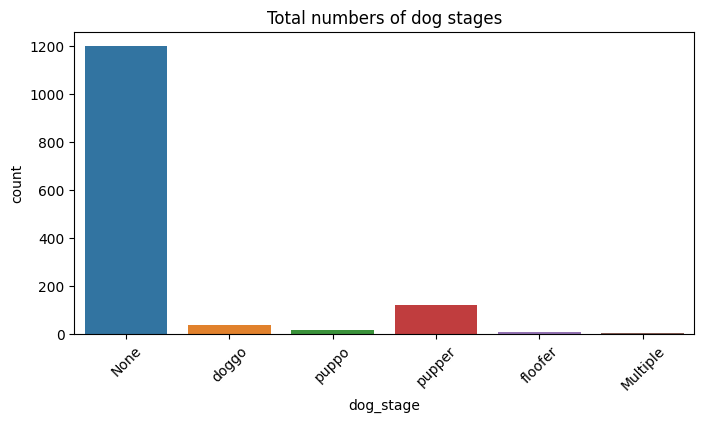

In [96]:
# Plotting the countplot of the column "dog_stage" in the dataframe
plot_count(x=twitter_archive_master["dog_stage"])
plt.title("Total numbers of dog stages");

### Insights 2: What is the most common source of the tweets?

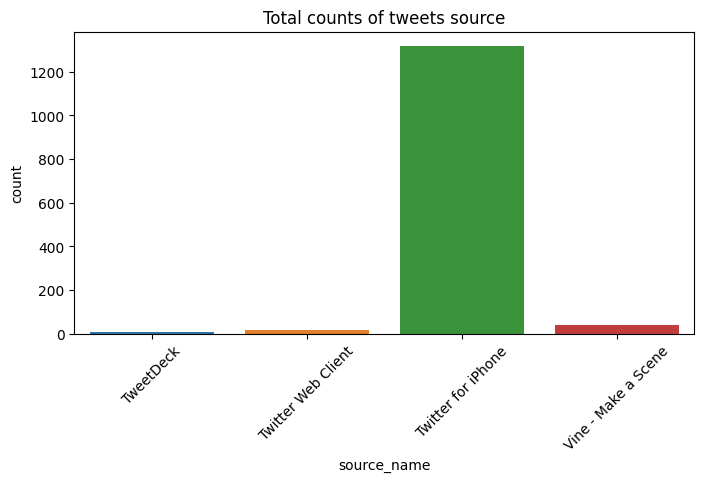

In [97]:
# Plotting the countplot of the column "source name" in the dataframe
plot_count(x=twitter_archive_master["source_name"])
plt.title("Total counts of tweets source");

### Insights 3: What source generated the most favortie count over a period of time?

In [98]:
# Defining a function for the repetitve scatterplot 
def plot_scatter(x, y, **kwargs):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x, y, **kwargs)
    plt.xticks(rotation=45)

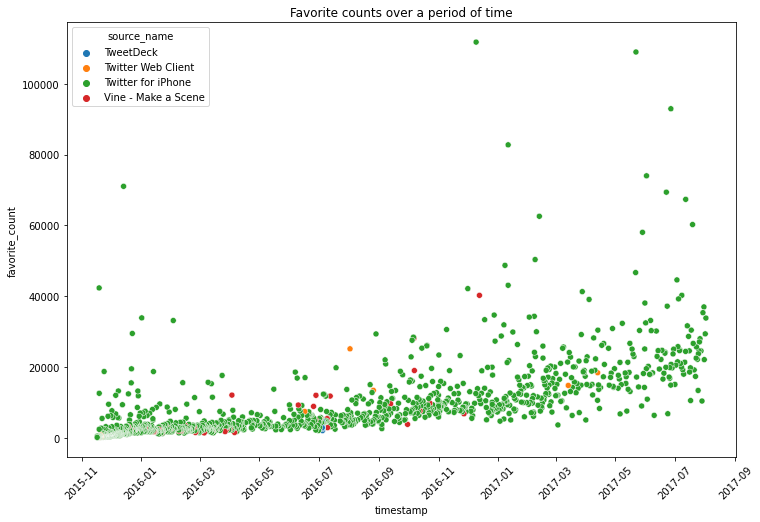

In [99]:
# Plotting the scatterplot favorite counts over a period of time
plot_scatter(x=twitter_archive_master["timestamp"], y=twitter_archive_master["favorite_count"], 
            hue=twitter_archive_master["source_name"])
plt.title("Favorite counts over a period of time");

### Insights 4: Name of the dog with the favorite count and the dog stage?

In [100]:
# Checking the row with the highest favorite count
twitter_archive_master.nlargest(1, "favorite_count")

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
315,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,111786,51740


### Insights 5: Source with the highest retweet counts over a period of time are?

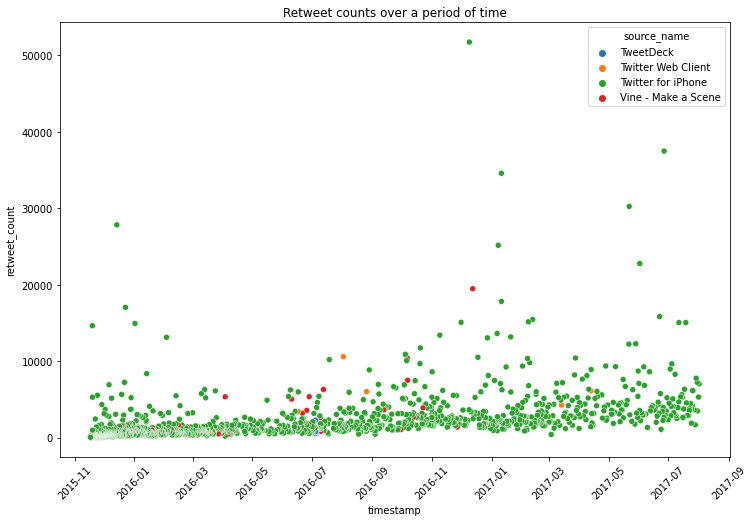

In [101]:
# Plotting the scatterplot of the source with the highest retweet count over a period of time
plot_scatter(x=twitter_archive_master["timestamp"], y=twitter_archive_master["retweet_count"], 
             hue=twitter_archive_master["source_name"])
plt.title("Retweet counts over a period of time");

### Insights 6: Name of the dog with the highest retweet count and the dog stage?

In [102]:
# Checking the row with the highest retweet count
twitter_archive_master.nlargest(1, "retweet_count")

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
315,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,http://twitter.com/download/iphone,Twitter for iPhone,None,...,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,111786,51740
